In [1]:
library(Seurat)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




## Load the data

In [2]:
seu <- readRDS("data/processed/integrated_annotated.rds")

## Subset AMC (Schwann cell precursors (SCPs), Chromaffin cells, Sympathoblasts)

In [6]:
unique(seu$celltype)

[1] Adrenal gland cortex                  
 [2] Chromaffin cells                      
 [3] Endothelium                           
 [4] Melanocytes                           
 [5] Subepicardial and abdominal mesenchyme
 [6] 3                                     
 [7] Sympathoblasts                        
 [8] Erythroid cells                       
 [9] Immune cells                          
[10] SCPs                                  
10 Levels: SCPs Chromaffin cells Sympathoblasts ... 3

In [14]:
seu_subset <- subset(seu, subset = celltype %in% c("SCPs", "Chromaffin cells", "Sympathoblasts"))

In [15]:
unique(seu_subset$celltype)

[1] Chromaffin cells Sympathoblasts   SCPs            
10 Levels: SCPs Chromaffin cells Sympathoblasts ... 3

## Recluster

In [ ]:
seu_subset <- NormalizeData(seu_subset)

In [ ]:
seu_subset <- FindVariableFeatures(seu_subset)

In [ ]:
seu_subset <- ScaleData(seu_subset)
seu_subset <- RunPCA(seu_subset)
seu_subset <- FindNeighbors(seu_subset, dims = 1:10)

Centering and scaling data matrix

PC_ 1 
Positive:  MPIG6B, PLP1, BTK, S100B, EDNRB, PTPRZ1, COL4A1, CH25H, CDH19, ABCA8 
	   COL5A2, NID1, ERBB3, FXYD1, POSTN, SPARC, GAS7, MPZ, GPM6B, OLFML2A 
	   COL20A1, AHNAK, BAMBI, CRYAB, TMEM176B, ALDH1A1, IGFBP4, SOX10, METRN, COL2A1 
Negative:  EEF1A2, RNASE2, PCSK1N, STMN2, BEX1, BEX2, RGS5, TUBB2B, TUBA1A, DBH 
	   CHGB, MLLT11, UCHL1, CALM2, TUBB2A, GAL, RTN1, BEX5, PHOX2A, NR0B2 
	   DDC, LY6H, SYT1, HBG1, HAND2-AS1, STMN4, TH, HAND2, TAGLN3, NSG1 
PC_ 2 
Positive:  PENK, DLK1, TENT5A, VGF, CARTPT, CHGA, PNMT, PARM1, NR4A1, FOSL2 
	   ZDBF2, PTAFR, VEGFA, PPP1R1B, SLC2A1, C2CD4A, LINC00473, MEG8, CCND2, GEM 
	   MEG3, SLC24A2, MIR7-3HG, GCH1, PEG10, SERTM2, DUSP2, PTPRN, TFPI2, TNFRSF12A 
Negative:  SOX4, TMSB4X, CCND1, GAP43, GIMAP4, CAVIN2, TUBB, TMSB15A, FGF23, KDR 
	   JPT1, TMEM88, LAMC3, EMCN, RTN1, RHD, CDH5, PLVAP, ESAM, FLT1 
	   MAB21L1, ITGA8, PRPH, ANXA2, ANK3, GIMAP1, MAP1B, TEK, STMN1, TMOD1 
PC_ 3 
Positive:  SPRR2F, PRPH,

In [ ]:
seu_subset <- FindClusters(seu_subset, resolution = 0.1)
seu_subset <- RunUMAP(seu_subset, dims = 1:10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1610
Number of edges: 55144

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9559
Number of communities: 4
Elapsed time: 0 seconds


05:10:27 UMAP embedding parameters a = 0.9922 b = 1.112

05:10:27 Read 1610 rows and found 10 numeric columns

05:10:27 Using Annoy for neighbor search, n_neighbors = 30

05:10:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:10:27 Writing NN index file to temp file /var/folders/wl/jrkngsm57b944tj7rtjg12000000gn/T//Rtmpccmos8/file609573251488

05:10:27 Searching Annoy index using 1 thread, search_k = 3000

05:10:28 Annoy recall = 100%

05:10:28 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

05:10:28 Initializing from normalized Laplacian + noise (using RSpectra)

05:10:28 Commencing optimization for 500 epochs, with 65684 positive edges

05:10:28 Using rng type: pcg

05:10:29 Optimization finished



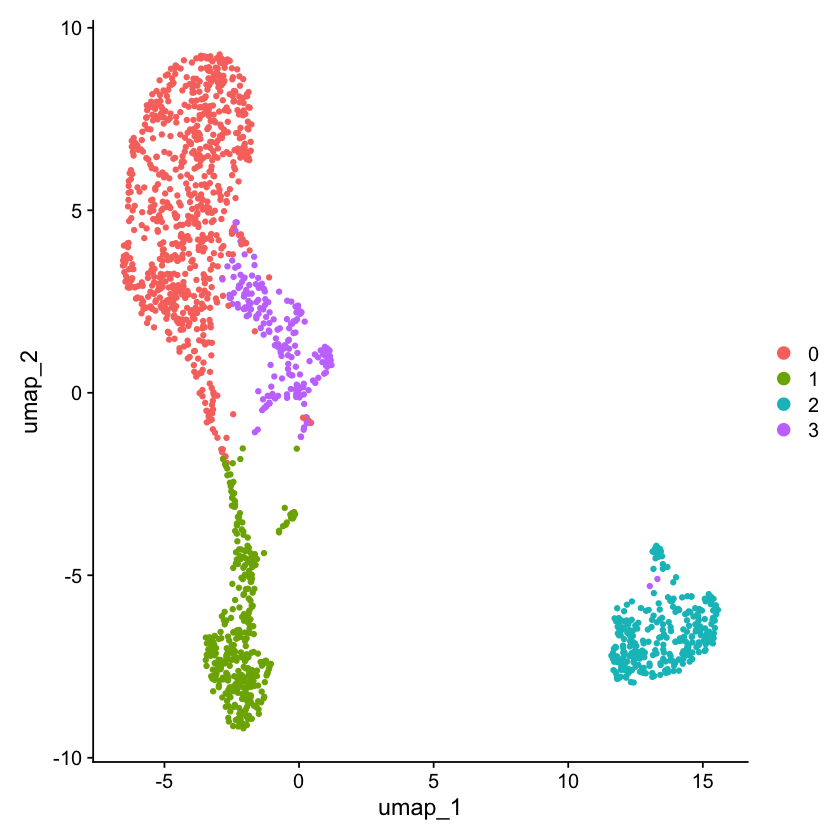

In [ ]:
DimPlot(seu_subset)